### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [2]:
# 先看一下裡面有什麼
print(digits.keys())
print("the shape {}".format(digits.images.shape))


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
the shape (1797, 8, 8)


In [3]:
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 先轉成熊貓的DataFarm 看一下內容
df_digits = pd.DataFrame(data=digits.data)
# 把target加進去
df_digits['target'] = digits.target
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


[[ 167.27247954   22.18515653]
 [ -48.71476497   51.30840484]
 [-100.719723     25.82132196]
 ...
 [ -51.43618206  -23.29369929]
 [  -0.22056414  -73.32775967]
 [ -11.36581193  -36.23661186]]


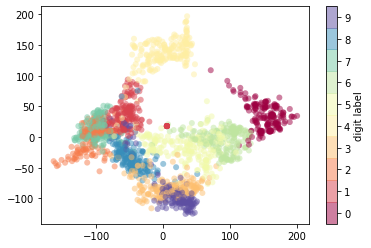

In [6]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)

print(data_projected)

plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))

plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)



In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=4)

# 建立模型
clf = GradientBoostingClassifier(
    loss="deviance",
    learning_rate=0.37,
    n_estimators=50
)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [8]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.98
